In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import os.path as path

In [3]:
df_train = pd.read_csv(path.join('1_rawdata', 'application_train.csv'))
df_test = pd.read_csv(path.join("1_rawdata", "application_test.csv"))

In [4]:
# concat before dummies
df = pd.concat([df_train, df_test], axis="index")

# easy data preparation by dropping all nulls
# df = df.dropna(axis='index')

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(356255, 122)

In [7]:
df.TARGET.isnull().sum()

48744

In [8]:
df.dropna(subset=['TARGET'], axis="index", inplace=True)

In [9]:
df.shape

(307511, 122)

# Display columns with missing data only

In [10]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0.0: # show only the columns with missing data
        print('{} - {}%'.format(col, round(pct_missing*100)))

AMT_ANNUITY - 0%
AMT_GOODS_PRICE - 0%
NAME_TYPE_SUITE - 0%
OWN_CAR_AGE - 66%
OCCUPATION_TYPE - 31%
CNT_FAM_MEMBERS - 0%
EXT_SOURCE_1 - 56%
EXT_SOURCE_2 - 0%
EXT_SOURCE_3 - 20%
APARTMENTS_AVG - 51%
BASEMENTAREA_AVG - 59%
YEARS_BEGINEXPLUATATION_AVG - 49%
YEARS_BUILD_AVG - 66%
COMMONAREA_AVG - 70%
ELEVATORS_AVG - 53%
ENTRANCES_AVG - 50%
FLOORSMAX_AVG - 50%
FLOORSMIN_AVG - 68%
LANDAREA_AVG - 59%
LIVINGAPARTMENTS_AVG - 68%
LIVINGAREA_AVG - 50%
NONLIVINGAPARTMENTS_AVG - 69%
NONLIVINGAREA_AVG - 55%
APARTMENTS_MODE - 51%
BASEMENTAREA_MODE - 59%
YEARS_BEGINEXPLUATATION_MODE - 49%
YEARS_BUILD_MODE - 66%
COMMONAREA_MODE - 70%
ELEVATORS_MODE - 53%
ENTRANCES_MODE - 50%
FLOORSMAX_MODE - 50%
FLOORSMIN_MODE - 68%
LANDAREA_MODE - 59%
LIVINGAPARTMENTS_MODE - 68%
LIVINGAREA_MODE - 50%
NONLIVINGAPARTMENTS_MODE - 69%
NONLIVINGAREA_MODE - 55%
APARTMENTS_MEDI - 51%
BASEMENTAREA_MEDI - 59%
YEARS_BEGINEXPLUATATION_MEDI - 49%
YEARS_BUILD_MEDI - 66%
COMMONAREA_MEDI - 70%
ELEVATORS_MEDI - 53%
ENTRANCES_MEDI - 50

FONDKAPREMONT_MODE - 68%
HOUSETYPE_MODE - 50%
TOTALAREA_MODE - 48%
WALLSMATERIAL_MODE - 51%
EMERGENCYSTATE_MODE - 47%
OBS_30_CNT_SOCIAL_CIRCLE - 0%
DEF_30_CNT_SOCIAL_CIRCLE - 0%
OBS_60_CNT_SOCIAL_CIRCLE - 0%
DEF_60_CNT_SOCIAL_CIRCLE - 0%
DAYS_LAST_PHONE_CHANGE - 0%
AMT_REQ_CREDIT_BUREAU_HOUR - 14%
AMT_REQ_CREDIT_BUREAU_DAY - 14%
AMT_REQ_CREDIT_BUREAU_WEEK - 14%
AMT_REQ_CREDIT_BUREAU_MON - 14%
AMT_REQ_CREDIT_BUREAU_QRT - 14%
AMT_REQ_CREDIT_BUREAU_YEAR - 14%


# Display number of missing values per observations

created missing indicator for: AMT_ANNUITY
created missing indicator for: AMT_GOODS_PRICE
created missing indicator for: NAME_TYPE_SUITE
created missing indicator for: OWN_CAR_AGE
created missing indicator for: OCCUPATION_TYPE
created missing indicator for: CNT_FAM_MEMBERS
created missing indicator for: EXT_SOURCE_1
created missing indicator for: EXT_SOURCE_2
created missing indicator for: EXT_SOURCE_3
created missing indicator for: APARTMENTS_AVG
created missing indicator for: BASEMENTAREA_AVG
created missing indicator for: YEARS_BEGINEXPLUATATION_AVG
created missing indicator for: YEARS_BUILD_AVG
created missing indicator for: COMMONAREA_AVG
created missing indicator for: ELEVATORS_AVG
created missing indicator for: ENTRANCES_AVG
created missing indicator for: FLOORSMAX_AVG
created missing indicator for: FLOORSMIN_AVG
created missing indicator for: LANDAREA_AVG
created missing indicator for: LIVINGAPARTMENTS_AVG
created missing indicator for: LIVINGAREA_AVG
created missing indicator 


created missing indicator for: FLOORSMIN_MODE
created missing indicator for: LANDAREA_MODE
created missing indicator for: LIVINGAPARTMENTS_MODE
created missing indicator for: LIVINGAREA_MODE
created missing indicator for: NONLIVINGAPARTMENTS_MODE
created missing indicator for: NONLIVINGAREA_MODE
created missing indicator for: APARTMENTS_MEDI
created missing indicator for: BASEMENTAREA_MEDI
created missing indicator for: YEARS_BEGINEXPLUATATION_MEDI
created missing indicator for: YEARS_BUILD_MEDI
created missing indicator for: COMMONAREA_MEDI
created missing indicator for: ELEVATORS_MEDI
created missing indicator for: ENTRANCES_MEDI
created missing indicator for: FLOORSMAX_MEDI
created missing indicator for: FLOORSMIN_MEDI
created missing indicator for: LANDAREA_MEDI
created missing indicator for: LIVINGAPARTMENTS_MEDI
created missing indicator for: LIVINGAREA_MEDI
created missing indicator for: NONLIVINGAPARTMENTS_MEDI
created missing indicator for: NONLIVINGAREA_MEDI
created missing 

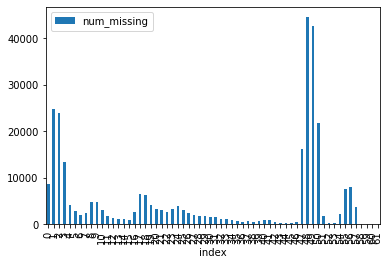

In [11]:
def missingplot(df):
    # first create missing indicator for features with missing data
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)
        
        if num_missing > 0:  
            print('created missing indicator for: {}'.format(col))
            df['{}_ismissing'.format(col)] = missing


    # then based on the indicator, plot the histogram of missing values
    ismissing_cols = [col for col in df.columns if 'ismissing' in col]
    df['num_missing'] = df[ismissing_cols].sum(axis=1)

    df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
    
missingplot(df)

In [12]:
# drop rows with more than 52 missing values
for i in range(52, 63):
    ind_missing = df[df['num_missing'] == i].index
    df = df.drop(ind_missing, axis=0)

In [13]:
# drop rows with missing values
for i in range(48, 50):
    ind_missing = df[df['num_missing'] == i].index
    df = df.drop(ind_missing, axis=0)

In [14]:
# drop rows with missing values
for i in range(1, 3):
    ind_missing = df[df['num_missing'] == i].index
    df = df.drop(ind_missing, axis=0)

In [15]:
# drop rows missing values
ind_missing = df[df['num_missing'] == 47].index
df = df.drop(ind_missing, axis=0)

In [16]:
# drop rows missing values
ind_missing = df[df['num_missing'] == 50].index
df = df.drop(ind_missing, axis=0)

In [17]:
# drop rows missing values
ind_missing = df[df['num_missing'] == 3].index
df = df.drop(ind_missing, axis=0)

In [18]:
df.shape

(98491, 190)

In [19]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0.0: # show only the columns with missing data
        print('{} - {}%'.format(col, round(pct_missing*100)))

AMT_ANNUITY - 0%
AMT_GOODS_PRICE - 0%
NAME_TYPE_SUITE - 1%
OWN_CAR_AGE - 64%
OCCUPATION_TYPE - 31%
CNT_FAM_MEMBERS - 0%
EXT_SOURCE_1 - 52%
EXT_SOURCE_2 - 0%
EXT_SOURCE_3 - 27%
APARTMENTS_AVG - 9%
BASEMENTAREA_AVG - 33%
YEARS_BEGINEXPLUATATION_AVG - 3%
YEARS_BUILD_AVG - 58%
COMMONAREA_AVG - 69%
ELEVATORS_AVG - 17%
ENTRANCES_AVG - 8%
FLOORSMAX_AVG - 6%
FLOORSMIN_AVG - 63%
LANDAREA_AVG - 36%
LIVINGAPARTMENTS_AVG - 64%
LIVINGAREA_AVG - 8%
NONLIVINGAPARTMENTS_AVG - 67%
NONLIVINGAREA_AVG - 23%
APARTMENTS_MODE - 9%
BASEMENTAREA_MODE - 33%
YEARS_BEGINEXPLUATATION_MODE - 3%
YEARS_BUILD_MODE - 58%
COMMONAREA_MODE - 69%
ELEVATORS_MODE - 17%
ENTRANCES_MODE - 8%
FLOORSMAX_MODE - 6%
FLOORSMIN_MODE - 63%
LANDAREA_MODE - 36%
LIVINGAPARTMENTS_MODE - 64%
LIVINGAREA_MODE - 8%
NONLIVINGAPARTMENTS_MODE - 67%
NONLIVINGAREA_MODE - 23%
APARTMENTS_MEDI - 9%
BASEMENTAREA_MEDI - 33%
YEARS_BEGINEXPLUATATION_MEDI - 3%
YEARS_BUILD_MEDI - 58%
COMMONAREA_MEDI - 69%
ELEVATORS_MEDI - 17%
ENTRANCES_MEDI - 8%
FLOORSMAX_M

In [20]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        # med = df[col].median()
        # df[col] = df[col].fillna(med)
        df[col] = df[col].fillna(-999)

imputing missing values for: AMT_ANNUITY
imputing missing values for: AMT_GOODS_PRICE
imputing missing values for: OWN_CAR_AGE
imputing missing values for: CNT_FAM_MEMBERS
imputing missing values for: EXT_SOURCE_1
imputing missing values for: EXT_SOURCE_2
imputing missing values for: EXT_SOURCE_3
imputing missing values for: APARTMENTS_AVG
imputing missing values for: BASEMENTAREA_AVG
imputing missing values for: YEARS_BEGINEXPLUATATION_AVG
imputing missing values for: YEARS_BUILD_AVG
imputing missing values for: COMMONAREA_AVG
imputing missing values for: ELEVATORS_AVG
imputing missing values for: ENTRANCES_AVG
imputing missing values for: FLOORSMAX_AVG
imputing missing values for: FLOORSMIN_AVG
imputing missing values for: LANDAREA_AVG
imputing missing values for: LIVINGAPARTMENTS_AVG
imputing missing values for: LIVINGAREA_AVG
imputing missing values for: NONLIVINGAPARTMENTS_AVG
imputing missing values for: NONLIVINGAREA_AVG
imputing missing values for: APARTMENTS_MODE
imputing miss

In [21]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        # top = df[col].describe()['top'] # impute with the most frequent value.
        # df[col] = df[col].fillna(top)
        df[col] = df[col].fillna('missing')

imputing missing values for: NAME_TYPE_SUITE
imputing missing values for: OCCUPATION_TYPE
imputing missing values for: FONDKAPREMONT_MODE
imputing missing values for: HOUSETYPE_MODE
imputing missing values for: WALLSMATERIAL_MODE
imputing missing values for: EMERGENCYSTATE_MODE


In [22]:
for i in df.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR


FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEA

In [23]:
# then drop the ismissing columns
df.drop(list(df.filter(regex = '_ismissing')), axis = 1, inplace = True)

In [24]:
df.drop(df[['num_missing']], axis=1, inplace=True)

# No more missing values

In [25]:
df.isnull().any().any()

False

# No duplicates

In [26]:
df.drop('SK_ID_CURR', inplace=True, axis="columns") # Drop the ID

In [27]:
# getting y
df_y = pd.DataFrame(df.TARGET)

In [28]:
# getting X
df.drop(df[['TARGET']], axis="columns", inplace=True)
df_X = pd.get_dummies(df)

In [29]:
# verifying shapes
print("\n df_X : ", df_X.shape, "\n df_y : ", df_y.shape)


 df_X :  (98491, 250) 
 df_y :  (98491, 1)


In [30]:
# store x and y
df_X.to_csv(path.join("2_dataprep", "prep_train_X.csv"), index=False)
df_y.to_csv(path.join("2_dataprep", "prep_train_y.csv"), index=False)